The **first galaxy was observed by a Persian astronomer Abd al-Rahman over 1,000 years ago**, and it was first believed to be an unknown extended structure. which is now known as **Messier-31 or the infamous Andromeda Galaxy**. From that point on, these unknown structures are more frequently observed and recorded, but it took more than 9 centuries for astronomers to manifest on an agreement that they were not just astronomical objects, but entire galaxies.

As the discoveries and classification of galaxies increased, several astronomers observed the divergent morphologies. Then, they started grouping previously reported galaxies and newly discovered galaxies based on morphological features which then formed a meaningful classification scheme.

### Galaxy Classification Model

Astronomy in this contemporary era has evolved massively in parallel with advances in computing over the years. Sophisticated computational techniques such as machine learning models are much more efficient now due to the dramatically increased efficiency in computer performance and huge data available to us today. 

Long Centuries ago, the galaxy classification was done by hand with a massive group of experienced people, who used to evaluate the results by using cross-validation algorithm. With this inspiration here we will introduce a Galaxy Classification Model with Machine Learning.

In [2]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=cbf427adc234aef440d1ada60a8890c1948e0c0cc80f0bfe4191fcad7552d40b
  Stored in directory: c:\users\waqas.ali\appdata\local\pip\cache\wheels\e1\27\13\3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import cufflinks as cf
cf.go_offline()
%matplotlib inline 

In [4]:
#Reading the data
# from google.colab import files
# uploaded = files.upload()
zoo = pd.read_csv('GalaxyZoo1_DR_table2.csv')
zoo.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


The first column is a unique identifier which cannot be a feature for our model, and the second and third columns are the absolute positions of galaxies which do not correlate with our classes/targets, so we can remove them all:

In [5]:
data = zoo.drop(['OBJID','RA','DEC'],axis=1)

As this is a Galaxy classification model, so we have to check the class imbalance in a dataset where we perform classification task even though its class binary imbalance may have a major effect in the phase training, and ultimately on precision. To plot the **value_counts for three-class columns**, we can do it like the code below:

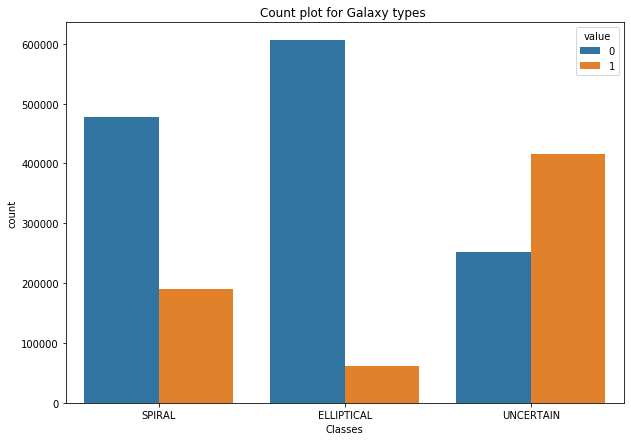

In [6]:
plt.figure(figsize=(10,7))
plt.title('Count plot for Galaxy types ')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()

### Splitting The Data
For any machine learning model that learns from data, this is a conventional method of dividing the original data into training sets and test sets, where the allocation percentages are **80% training set and 20% test set** and the data set at least should have 1000 data points to avoid overfitting and to simply increase the training period of any model. So now let’s split the data into training and test sets:

In [7]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [9]:
# normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building Neural Networks for Galaxy Classification Model

Sequential, in Keras, allows us to build the Multilayered Perceptron model from scratch. We can add each layer with a unit number as a parameter of the Dense function where each unit number implies that many densely connected neurons. Now let’s build neural networks using TensorFlow and Keras:

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
import time
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
start = time.perf_counter()

Now let’s fit the data into our neural network. It will take some time to run as the data is itself very large and neural network models take time to run:

In [12]:
model.fit(x=X_train,y=y_train,epochs=20)
print('\nTIME ELAPSED {}Seconds'.format(time.perf_counter() - start))

Epoch 1/20
16699/16699 [==============================] - 33s 2ms/step - loss: 0.3528 - accuracy: 0.8495
Epoch 2/20
16699/16699 [==============================] - 30s 2ms/step - loss: 0.2555 - accuracy: 0.8895
Epoch 3/20
16699/16699 [==============================] - 29s 2ms/step - loss: 0.2493 - accuracy: 0.8921
Epoch 4/20
16699/16699 [==============================] - 29s 2ms/step - loss: 0.2440 - accuracy: 0.8928
Epoch 5/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2363 - accuracy: 0.8954
Epoch 6/20
16699/16699 [==============================] - 28s 2ms/step - loss: 0.2321 - accuracy: 0.8975
Epoch 7/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2297 - accuracy: 0.8987
Epoch 8/20
16699/16699 [==============================] - 26s 2ms/step - loss: 0.2295 - accuracy: 0.8975
Epoch 9/20
16699/16699 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.89 - 25s 2ms/step - loss: 0.2256 - accuracy: 0.8990
Epoch 10/20
1

Now let’s plot the accuracy to have a look at the accuracy of the neural networks at each epoch:

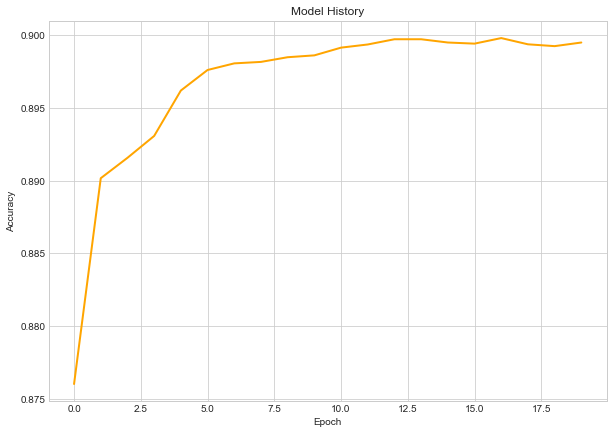

In [13]:
mod_history = pd.DataFrame(model.history.history)

plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.title('Model History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'],color='orange',lw=2)

From this precision graph, we can deduce that after a certain epoch, i.e. approximately from the 6th epoch, the precision remained constant for all other epochs. Now let’s take our model through the confusion matrix algorithm and print a classification report:

In [14]:
y_pred = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test.argmax(axis=1),y_pred)
print(classification_report(y_test.argmax(axis=1),y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



              precision    recall  f1-score   support

           0       0.85      0.91      0.88     38281
           1       0.90      0.77      0.83     12554
           2       0.92      0.91      0.92     82754

    accuracy                           0.90    133589
   macro avg       0.89      0.86      0.88    133589
weighted avg       0.90      0.90      0.90    133589



Well, this is very basic astronomical data with features that we can’t even begin to interpret. But still, we got very good results. If we had an astronomy background to study, organize and add more features, this model will be sure to work well better than what we did.